In [1]:
# -*- coding: utf-8 -*-
%pylab inline

import numpy
import pandas
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn

# bug fix for display formats to avoid run time errors
pandas.set_option('display.float_format', lambda x:'%.2f'%x)

data = pandas.read_csv('gapminder.csv')

# convert to numeric format
data['internetuserate'] = pandas.to_numeric(data['internetuserate'], errors='coerce')
data['urbanrate'] = pandas.to_numeric(data['urbanrate'], errors='coerce')
data['femaleemployrate'] = pandas.to_numeric(data['femaleemployrate'], errors='coerce')

# listwise deletion of missing values
sub1 = data[['urbanrate', 'femaleemployrate', 'internetuserate']].dropna()

Populating the interactive namespace from numpy and matplotlib


                            OLS Regression Results                            
Dep. Variable:       femaleemployrate   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                     16.69
Date:                Sat, 20 Feb 2016   Prob (F-statistic):           6.84e-05
Time:                        16:41:56   Log-Likelihood:                -678.68
No. Observations:                 167   AIC:                             1361.
Df Residuals:                     165   BIC:                             1368.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept      47.6024      1.096     43.416      

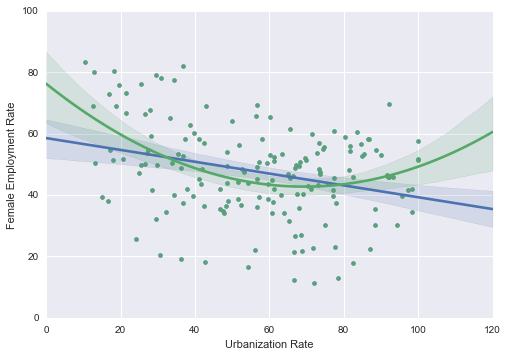

In [2]:
####################################################################################
# POLYNOMIAL REGRESSION
####################################################################################

# first order (linear) scatterplot
scat1 = seaborn.regplot(x="urbanrate", y="femaleemployrate", scatter=True, data=sub1)
plt.xlabel('Urbanization Rate')
plt.ylabel('Female Employment Rate')

# fit second order polynomial
# run the 2 scatterplots together to get both linear and second order fit lines
scat1 = seaborn.regplot(x="urbanrate", y="femaleemployrate", scatter=True, order=2, data=sub1)
plt.xlabel('Urbanization Rate')
plt.ylabel('Female Employment Rate')


# center quantitative IVs for regression analysis
sub1['urbanrate_c'] = (sub1['urbanrate'] - sub1['urbanrate'].mean())
sub1['internetuserate_c'] = (sub1['internetuserate'] - sub1['internetuserate'].mean())
sub1[["urbanrate_c", "internetuserate_c"]].describe()

# linear regression analysis
reg1 = smf.ols('femaleemployrate ~ urbanrate_c', data=sub1).fit()
print (reg1.summary())

# quadratic (polynomial) regression analysis

# run following line of code if you get PatsyError 'ImaginaryUnit' object is not callable
reg2 = smf.ols('femaleemployrate ~ urbanrate_c + I(urbanrate_c**2)', data=sub1).fit()
print (reg2.summary())


                            OLS Regression Results                            
Dep. Variable:       femaleemployrate   R-squared:                       0.180
Model:                            OLS   Adj. R-squared:                  0.165
Method:                 Least Squares   F-statistic:                     11.92
Date:                Sat, 20 Feb 2016   Prob (F-statistic):           4.25e-07
Time:                        16:41:58   Log-Likelihood:                -670.17
No. Observations:                 167   AIC:                             1348.
Df Residuals:                     163   BIC:                             1361.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
Intercept              43.9886    

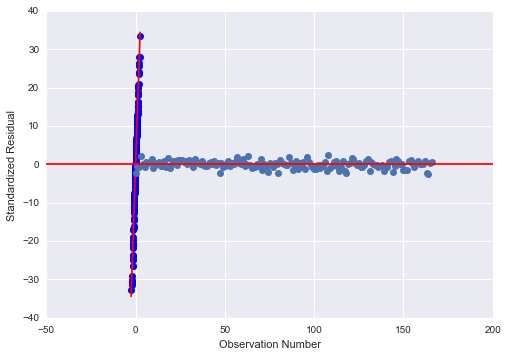

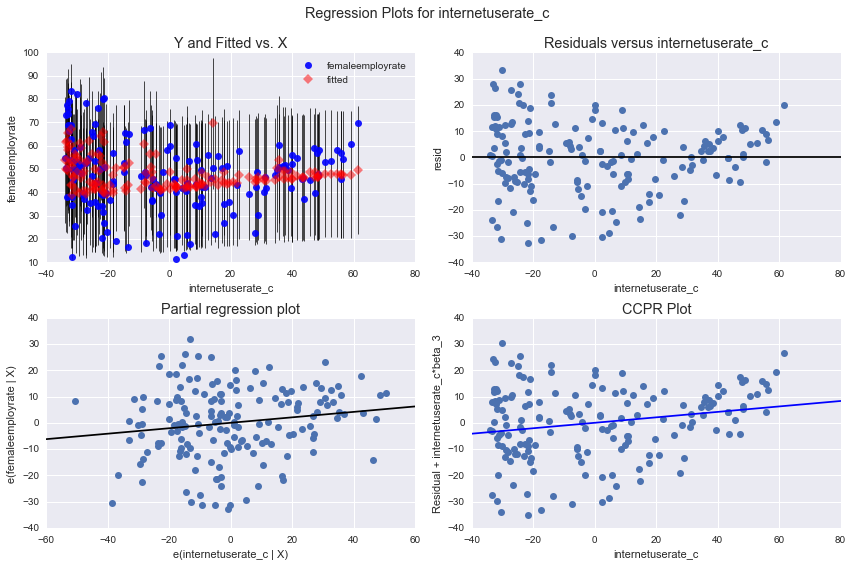

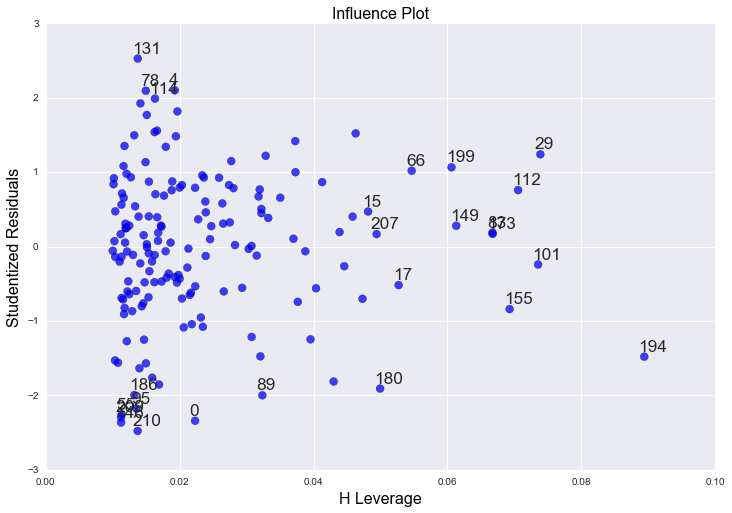

In [3]:
####################################################################################
# EVALUATING MODEL FIT
####################################################################################

# adding internet use rate
reg3 = smf.ols('femaleemployrate  ~ urbanrate_c + I(urbanrate_c**2) + internetuserate_c', 
               data=sub1).fit()
print (reg3.summary())

#Q-Q plot for normality
fig4=sm.qqplot(reg3.resid, line='r')

# simple plot of residuals
stdres=pandas.DataFrame(reg3.resid_pearson)
plt.plot(stdres, 'o', ls='None')
l = plt.axhline(y=0, color='r')
plt.ylabel('Standardized Residual')
plt.xlabel('Observation Number')


# additional regression diagnostic plots
fig2 = plt.figure(figsize(12,8))
fig2 = sm.graphics.plot_regress_exog(reg3,  "internetuserate_c", fig=fig2)

# leverage plot
fig3=sm.graphics.influence_plot(reg3, size=8)
print(fig3)

# ASSIGNMENT